In [118]:
%matplotlib inline
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.colors import Colormap
import matplotlib.cm as cm
import matplotlib.colors as colors
from astropy.io import ascii
import matplotlib.patches as patches

matplotlib.rcParams.update({'font.size':20})
#matplotlib.rcParams.update({'font.family':'serif'})

In [21]:
#data = 'data.csv'
#df = pd.read_csv(data)
#df.columns
infile = 'summary-toupies-v3-send.dat'
df = ascii.read(infile, format='commented_header')

In [18]:
def makeshape(paramX, paramY):
    xx = [-1.*paramX, 1.*paramX, 1.*paramX, -1.*paramX, -1*paramX]
    yy = [-1.*paramY, -1.*paramY, 1.*paramY, 1.*paramY, -1*paramY]
    out = list(zip(xx, yy))
    return out

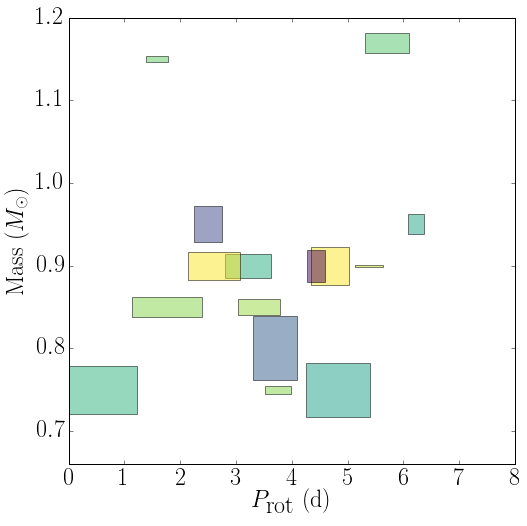

In [78]:
plt.figure(figsize=(8,8))

normScalarMap = cm.ScalarMappable(norm=colors.Normalize(vmin=min(df['pol']),vmax=max(df['pol'])), cmap='viridis')

for k in range(len(df['axisym'])):
    #plt.scatter(df['Prot'][k], df['M'][k], s=((df['B_max'][k])*10), 
    #            c=df['pol.'][k], cmap=cm.jet, marker=None, alpha=0.5, 
    #            verts=makeshape(2-df['axisym'][k]/100.,df['axisym'][k]/50.))
    plt.scatter(df['Prot'][k], df['M'][k], s=((df['B_max'][k])*10), 
                c=normScalarMap.to_rgba(df['pol'][k]), marker=None, alpha=0.5, 
                verts=makeshape(2-df['axisym'][k]/100.,df['axisym'][k]/50.))

# plt.yscale('log')
#plt.xscale('log')
plt.ylim(0.66, 1.2)
plt.xlim(0, 8)
plt.xlabel(r'$P_{\textrm{rot}}$ (d)')
plt.ylabel(r'Mass ($M_{\odot}$)')

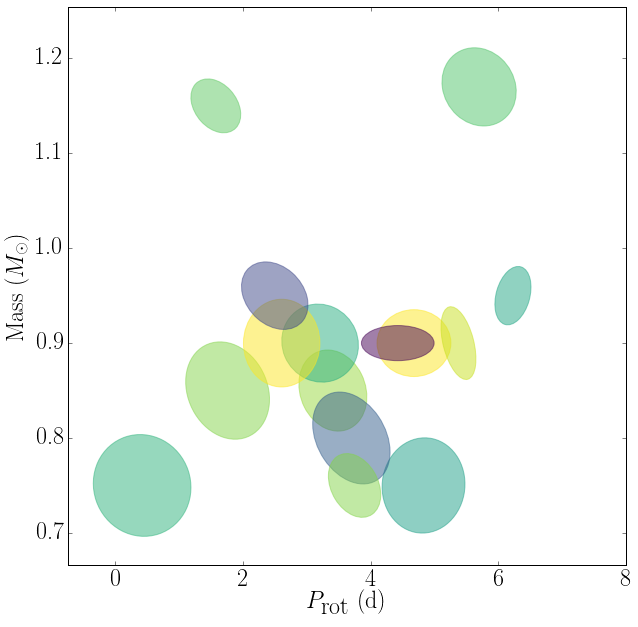

In [105]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)

#plt.xscale('log')
#plt.ylim(0.6, 1)
#plt.xlim(1e-1, 10)

plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel(r'$P_{\textrm{rot}}$ (d)')
plt.ylabel(r'Mass ($M_{\odot}$)')

normxs = (df['Prot'] - min(df['Prot'])) / (max(df['Prot']) - min(df['Prot']))
normys = (df['M'] - min(df['M'])) / (max(df['M']) - min(df['M']))

xlabels = [item.get_text() for item in ax1.get_xticklabels()]
xlabels = [0, 2, 4, 6, 8]
# range should map 0 to 1 to min(df['Prot']) to max(df['Prot'])
xticks = (np.array(xlabels) - min(df['Prot'])) / (max(df['Prot']) - min(df['Prot']))
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)


ylabels = [item.get_text() for item in ax1.get_yticklabels()]
ylabels = [0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
# range should map 0 to 1 to min(df['M']) to max(df['M'])
#yticks = [0.0, 0.5, 0.6]
yticks = (np.array(ylabels) - min(df['M'])) / (max(df['M']) - min(df['M']))
ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
#print(yticks)
#print(ylabels)
#print(normys)
#print(df['M'])

# x and y correspond to df['Prot'][k] and df['M'][k]
# color corresponds to poloidal
# width corresponds to axisymmetry * magnetic field strength
# height corresponds to 1 - (axisymmetry* magnetic field strength)
# angle corresponds to toroidal?

widths = np.log10((df['axisym']/100.*df['B_max'])) / 10
heights = np.log10((1 - df['axisym']/100.)*df['B_max']) / 10
angles = (df['tor'] - min(df['tor'])) / (max(df['tor']) - min(df['tor']))*180

for i in range(len(normxs)):
    p = patches.Ellipse((normxs[i], normys[i]), width=widths[i], height=heights[i], angle=angles[i], 
                        alpha=0.5, color=normScalarMap.to_rgba(df['pol'][i]))
    ax1.add_patch(p)

#for p in [
#    patches.Ellipse((normxs[0], normys[0]), 0.1, 0.1, angle=0.0),
#    patches.Ellipse((normxs[1], normys[1]), 0.1, 0.1, angle=20.0),
#    patches.Ellipse((normxs[2], normys[2]), 0.1, 0.1, angle=90),
#    patches.Ellipse((normxs[3], normys[3]), 0.1, 0.1, angle=120),
#]:
#    ax1.add_patch(p)

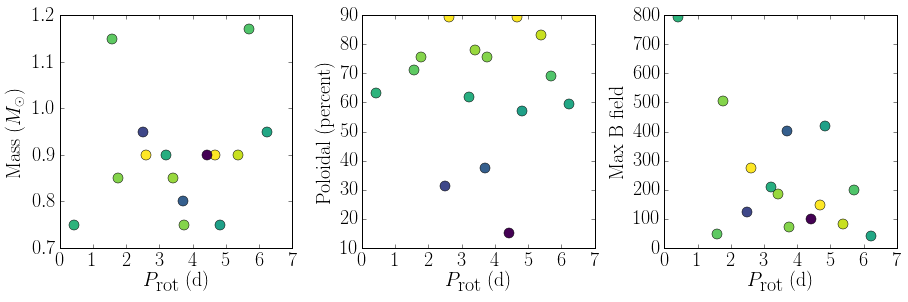

In [130]:
fig2 = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

ax1 = fig2.add_subplot(331)
for j in range(0,len(df)):
    ax1.plot(df['Prot'][j], df['M'][j], marker='o', ms=10, ls='None', color=normScalarMap.to_rgba(df['pol'][j]))
plt.xlabel(r'$P_{\textrm{rot}}$ (d)')
plt.ylabel(r'Mass ($M_{\odot}$)')

ax2 = fig2.add_subplot(332)
for j in range(0,len(df)):
    ax2.plot(df['Prot'][j], df['pol'][j], marker='o', ms=10, ls='None', color=normScalarMap.to_rgba(df['pol'][j]))
plt.xlabel(r'$P_{\textrm{rot}}$ (d)')
plt.ylabel('Poloidal (percent)')

ax3 = fig2.add_subplot(333)
for j in range(0,len(df)):
    ax3.plot(df['Prot'][j], df['B_max'][j], marker='o', ms=10, ls='None', color=normScalarMap.to_rgba(df['pol'][j]))
plt.xlabel(r'$P_{\textrm{rot}}$ (d)')
plt.ylabel('Max B field')